# Turkey_and_Syria_Earthquake_Tweets

In [2]:
#!pip install -q -U --pre pycaret

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
from collections import Counter
import re

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [6]:
import pandas as pd

df = pd.read_csv('tweets.csv')

In [7]:
df.shape

(478052, 11)

In [8]:
df.head()

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,coordinates,place,source
0,2023-02-21 03:30:04+00:00,तुर्की में सोमवार देर रात भूंकप के तेज झटके मह...,"['ATDigital', 'Turkey', 'Earthquake', 'TurkeyE...",0.0,0.0,19727712.0,True,hi,NaN,NaN,Twitter Media Studio
1,2023-02-21 03:29:07+00:00,New search &amp; rescue work is in progress in...,"['Hatay', 'earthquakes', 'Türkiye', 'TurkiyeQu...",1.0,0.0,5697.0,True,en,NaN,NaN,Twitter Web App
2,2023-02-21 03:29:04+00:00,Can't imagine those who still haven't recovere...,"['Turkey', 'earthquake', 'turkeyearthquake2023...",0.0,0.0,1.0,False,en,NaN,NaN,Twitter for Android
3,2023-02-21 03:28:06+00:00,its a highkey sign for all of us to ponder ove...,"['turkeyearthquake2023', 'earthquake', 'Syria']",0.0,0.0,3.0,False,en,NaN,NaN,Twitter for Android
4,2023-02-21 03:27:38+00:00,Turkiye Earthquake: तुर्किए में फिर आया भूकंप ...,"['turkey', 'earthquake', 'turkiye', 'india', '...",0.0,0.0,17.0,False,und,NaN,NaN,Twitter for Android


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478052 entries, 0 to 478051
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             478052 non-null  object 
 1   content          478052 non-null  object 
 2   hashtags         478034 non-null  object 
 3   like_count       478035 non-null  float64
 4   rt_count         478035 non-null  float64
 5   followers_count  478035 non-null  float64
 6   isVerified       478035 non-null  object 
 7   language         478035 non-null  object 
 8   coordinates      20669 non-null   object 
 9   place            20196 non-null   object 
 10  source           478035 non-null  object 
dtypes: float64(3), object(8)
memory usage: 40.1+ MB


In [10]:
df.isna().any()

date               False
content            False
hashtags            True
like_count          True
rt_count            True
followers_count     True
isVerified          True
language            True
coordinates         True
place               True
source              True
dtype: bool

# Preprocessing Function

In [11]:
import re
import string

In [12]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

In [13]:
df['content'] = df['content'].apply(preprocess_text)

# Commonly Used Words

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [15]:
all_text = ' '.join(df['content'].values)

In [19]:
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [20]:
# Split the text into individual words
words = all_text.split()

In [21]:
words

['तुर्की',
 'में',
 'सोमवार',
 'देर',
 'रात',
 'भूंकप',
 'के',
 'तेज',
 'झटके',
 'महसूस',
 'किए',
 'गए',
 'हताय',
 'प्रांत',
 'में',
 '64',
 'तीव्रता',
 'का',
 'भूकंप',
 'महसूस',
 'किया',
 'गया',
 '6',
 'फरवरी',
 'को',
 '74',
 'तीव्रता',
 'के',
 'महाविनाशकारी',
 'भूकंप',
 'के',
 'बाद',
 'एक',
 'बार',
 'फिर',
 'तुर्की',
 'में',
 'दहशत',
 'का',
 'माहौल',
 'है',
 'new',
 'search',
 'amp',
 'rescue',
 'work',
 'is',
 'in',
 'progress',
 'in',
 'after',
 'two',
 'more',
 'hit',
 '’s',
 'southeastern',
 'province',
 'cant',
 'imagine',
 'those',
 'who',
 'still',
 'havent',
 'recovered',
 'from',
 'the',
 'previous',
 'tragedy',
 'amp',
 'lost',
 'a',
 'lot',
 'but',
 'now',
 'having',
 'to',
 'face',
 'another',
 'disaster',
 '🇹🇷',
 'just',
 'got',
 'hit',
 'by',
 'another',
 '64',
 'magnitude',
 'earthquake',
 'may',
 'allah',
 'have',
 'mercy',
 'on',
 'us',
 'ya',
 'allah',
 'reham🙏🏻',
 'its',
 'a',
 'highkey',
 'sign',
 'for',
 'all',
 'of',
 'us',
 'to',
 'ponder',
 'over',
 'our',
 'a

In [22]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [23]:
# Count the frequency of each word
word_counts = Counter(words)

In [24]:
word_counts

Counter({'तुर्की': 3462,
         'में': 7367,
         'सोमवार': 95,
         'देर': 19,
         'रात': 41,
         'भूंकप': 33,
         'के': 7067,
         'तेज': 145,
         'झटके': 476,
         'महसूस': 232,
         'किए': 196,
         'गए': 381,
         'हताय': 10,
         'प्रांत': 28,
         '64': 913,
         'तीव्रता': 774,
         'का': 2538,
         'भूकंप': 4586,
         'किया': 345,
         'गया': 436,
         '6': 4924,
         'फरवरी': 58,
         'को': 2157,
         '74': 925,
         'महाविनाशकारी': 12,
         'बाद': 814,
         'एक': 909,
         'बार': 205,
         'फिर': 317,
         'दहशत': 31,
         'माहौल': 13,
         'है': 2838,
         'new': 3442,
         'search': 3761,
         'amp': 21778,
         'rescue': 11726,
         'work': 1751,
         'progress': 70,
         'two': 3116,
         'hit': 7237,
         '’s': 1083,
         'southeastern': 811,
         'province': 1224,
         'cant': 1050,
         'imagi

In [25]:
top_words = word_counts.most_common(100)
top_words

[('earthquake', 51522),
 ('turkey', 46253),
 ('people', 32463),
 ('lütfen', 31650),
 ('yardım', 26374),
 ('syria', 25946),
 ('de', 25489),
 ('bir', 22843),
 ('help', 22373),
 ('amp', 21778),
 ('bu', 21122),
 ('allah', 20963),
 ('var', 16251),
 ('çok', 14665),
 ('en', 14092),
 ('prayers', 13307),
 ('enkaz', 13075),
 ('için', 12823),
 ('deprem', 12593),
 ('hatay', 12503),
 ('may', 12442),
 ('🇹🇷', 12228),
 ('km', 12212),
 ('rescue', 11726),
 ('magnitude', 11520),
 ('affected', 11432),
 ('aid', 10853),
 ('yok', 10376),
 ('altında', 10088),
 ('olsun', 10085),
 ('rubble', 9843),
 ('yardim', 9745),
 ('78', 9367),
 ('ne', 9294),
 ('mahallesi', 9127),
 ('في', 8924),
 ('please', 8747),
 ('pray', 8741),
 ('victims', 8498),
 ('da', 8195),
 ('ago', 8129),
 ('la', 8077),
 ('earthquakes', 8053),
 ('death', 8053),
 ('us', 7984),
 ('toll', 7835),
 ('devastating', 7815),
 ('🙏', 7758),
 ('من', 7549),
 ('disaster', 7509),
 ('و', 7494),
 ('time', 7462),
 ('acil', 7420),
 ('में', 7367),
 ('arkadaşlar', 7354

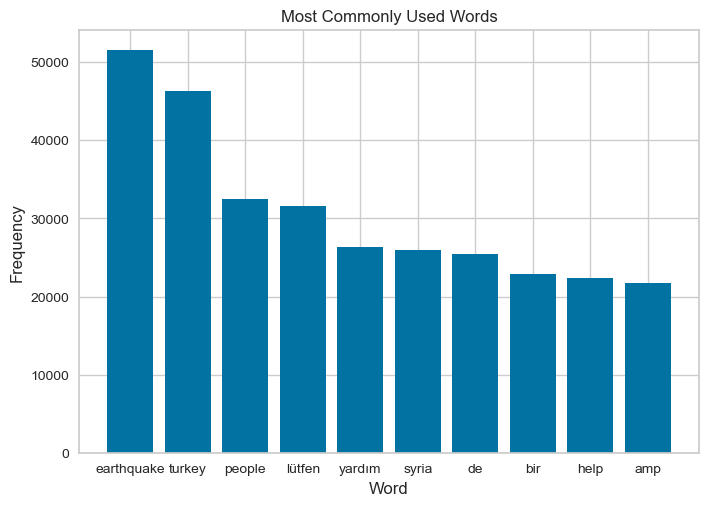

In [26]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

# Creating Classes for Tweets

In [27]:
# Define the classes and their corresponding keywords
classes = {
    'Help': ['help', 'assistance', 'support', 'donate'],
    'News': ['earthquake', 'magnitude', 'aftershock', 'rescue', 'recovery'],
    'Funding': ['fundraiser', 'donation', 'charity', 'fund'],
    'Survivor stories': ['survivor', 'personal account', 'experience', 'impact'],
    'Volunteering': ['volunteer', 'helping', 'aid', 'support'],
    'Political response': ['government', 'political', 'action', 'response'],
    'Humanitarian aid': ['humanitarian', 'aid', 'relief', 'support'],
    'Casualty reports': ['injury', 'death', 'fatal', 'missing', 'victims'],
    'Infrastructure damage': ['building', 'bridge', 'road', 'power', 'water', 'gas', 'telecommunications'],
    'Weather conditions': ['storm', 'rain', 'snow', 'wind', 'temperature', 'weather'],
    'Emergency services': ['ambulance', 'fire', 'police', 'emergency', 'rescue'],
    'Social media activity': ['tweet', 'post', 'share', 'social media'],
    'Prayer and condolences': ['prayer', 'thoughts', 'condolences', 'sympathy'],
    'Technical information': ['data', 'statistics', 'analysis', 'technical'],
    'International aid': ['international', 'donor', 'aid', 'relief'],
    'Business impact': ['business', 'economic', 'financial', 'impact'],
    'Personal safety': ['safety', 'evacuation', 'shelter', 'protection', 'precaution']
}

In [28]:
# Define a function to label each tweet based on its content
def classify_tweet(tweet_text):
    for class_name, keywords in classes.items():
        for keyword in keywords:
            if keyword in tweet_text:
                return class_name
    return 'Other'  # If no keyword matches, label as "Other"

In [29]:
# Add a new column to the dataframe with the class label for each tweet
df['Class'] = df['content'].apply(classify_tweet)

# Save the labeled dataset to a new CSV file
df.to_csv('tweet_data_labeled.csv', index=False)

In [30]:
df_pre=df

In [31]:
df = pd.read_csv('tweet_data_labeled.csv')

In [32]:
df.head()

,date,content,hashtags,like_count,rt_count,followers_count,isVerified,language,coordinates,place,source,Class
0,2023-02-21 03:30:04+00:00,तुर्की में सोमवार देर रात भूंकप के तेज झटके मह...,"['ATDigital', 'Turkey', 'Earthquake', 'TurkeyE...",0.0,0.0,19727712.0,True,hi,NaN,NaN,Twitter Media Studio,Other
1,2023-02-21 03:29:07+00:00,new search amp rescue work is in progress in a...,"['Hatay', 'earthquakes', 'Türkiye', 'TurkiyeQu...",1.0,0.0,5697.0,True,en,NaN,NaN,Twitter Web App,News
2,2023-02-21 03:29:04+00:00,cant imagine those who still havent recovered ...,"['Turkey', 'earthquake', 'turkeyearthquake2023...",0.0,0.0,1.0,False,en,NaN,NaN,Twitter for Android,News
3,2023-02-21 03:28:06+00:00,its a highkey sign for all of us to ponder ove...,"['turkeyearthquake2023', 'earthquake', 'Syria']",0.0,0.0,3.0,False,en,NaN,NaN,Twitter for Android,Political response
4,2023-02-21 03:27:38+00:00,turkiye earthquake तुर्किए में फिर आया भूकंप,"['turkey', 'earthquake', 'turkiye', 'india', '...",0.0,0.0,17.0,False,und,NaN,NaN,Twitter for Android,News


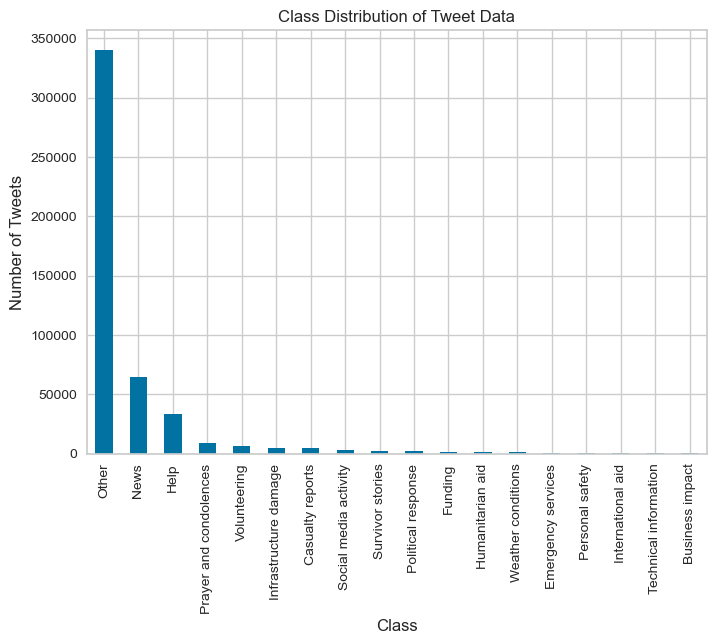

In [33]:
# Create a bar plot of the class distribution
class_counts = df['Class'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Tweet Data')
plt.xlabel('Class')
plt.ylabel('Number of Tweets')
plt.show()

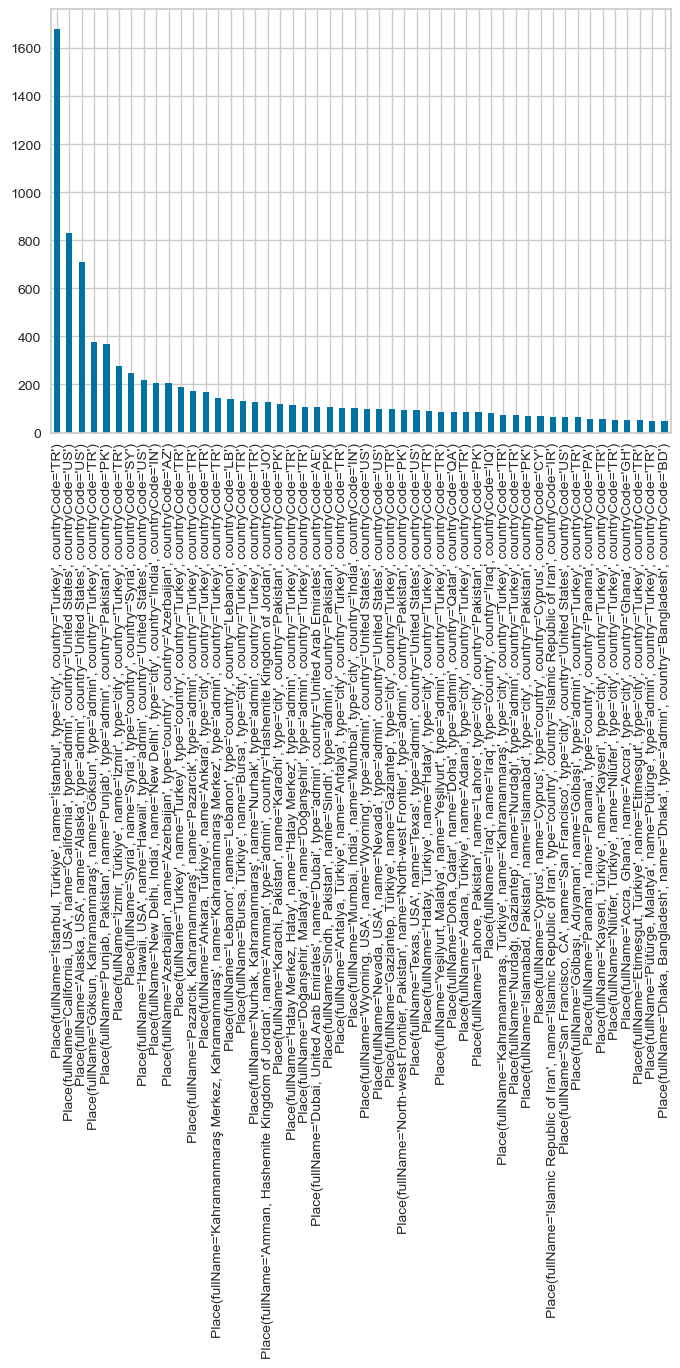

In [45]:
df.place.value_counts().head(50).plot(kind='bar');

In [64]:
##İhtiyacımız Olmayan Kolonların Kaldırılması
df.drop(['date', 'hashtags', 'like_count', 'rt_count',
       'followers_count', 'isVerified', 'language', 'coordinates', 'place',
       'source'], axis = 1, inplace = True)

In [65]:
df['content'].isna().sum()

52861

In [66]:
df.dropna(axis = 0, inplace = True)

In [67]:
df.shape

(425191, 2)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['content'])
y = df['Class']

# Simple Prediction of Classes

In [69]:
# Sample input tweet
input_tweet = "I just donated to the earthquake relief fund. Let's support those affected by this disaster. #donation #earthquake #relief"

# Classify the tweet
predicted_class = classify_tweet(input_tweet)

# Print the predicted class
print('Predicted class:', predicted_class)

Predicted class: Help


# Class Distributions

In [73]:
# Count the number of instances in each class
class_counts = df['Class'].value_counts()

# Print the class distribution
print('Class distribution:')
print(class_counts)

Class distribution:
Other                     287022
News                       64735
Help                       33599
Prayer and condolences      8566
Volunteering                6791
Infrastructure damage       5080
Casualty reports            4988
Social media activity       3352
Survivor stories            2124
Political response          2114
Funding                     1691
Humanitarian aid            1538
Weather conditions          1160
Emergency services           861
Personal safety              485
International aid            447
Technical information        323
Business impact              315
Name: Class, dtype: int64


# Visualizations - WordCloud

In [76]:
#pip install wordcloud

In [77]:
from wordcloud import WordCloud

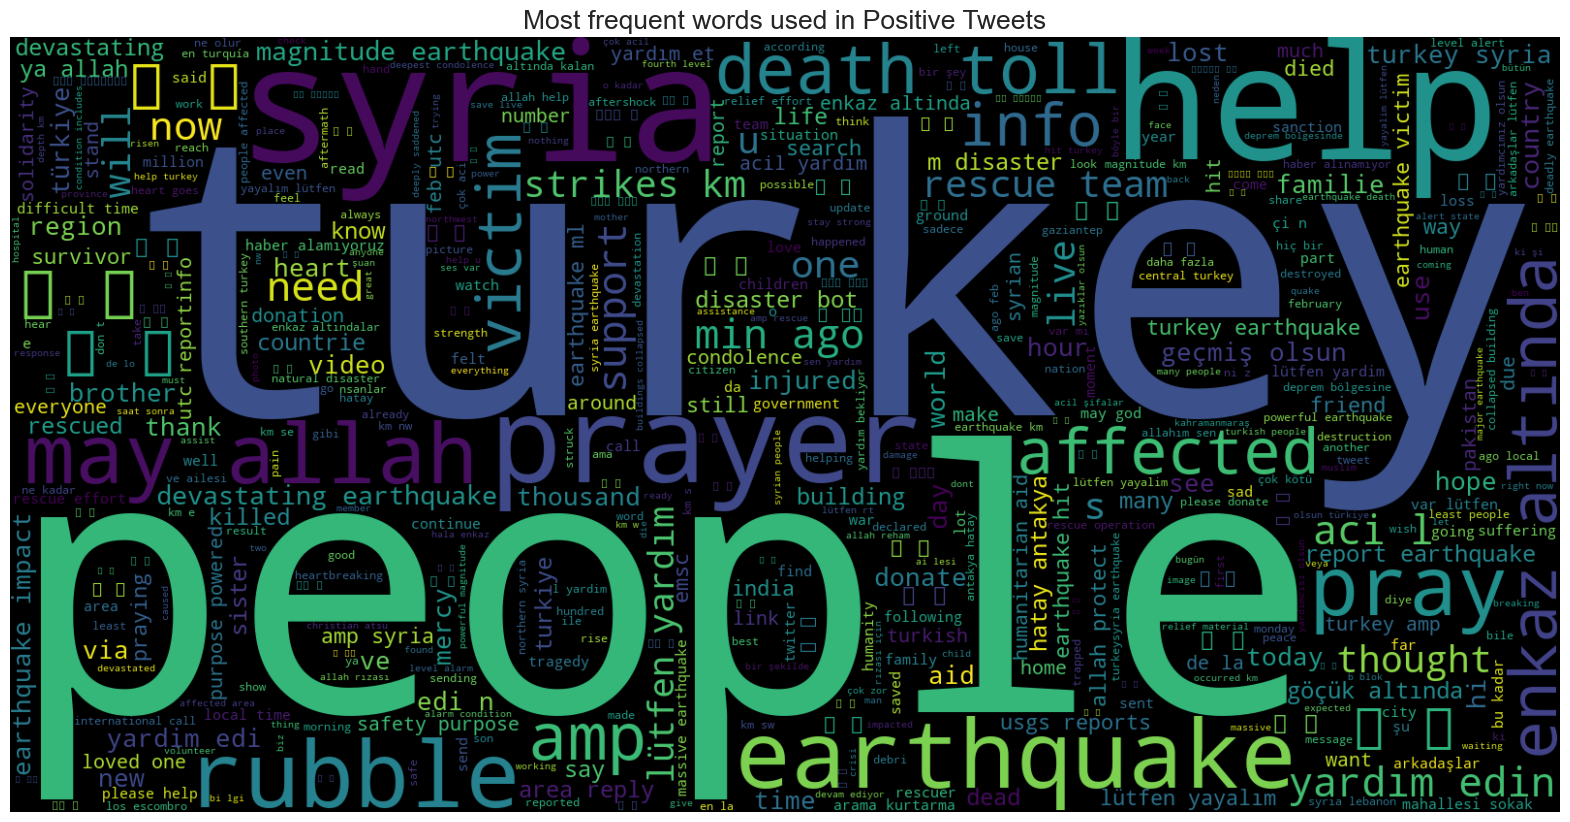

In [78]:
text = ' '.join([word for word in df['content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Positive Tweets', fontsize=19)
plt.show()